<a href="https://colab.research.google.com/github/Samukelo789/Data-Science-Projects/blob/main/South_African_Unemployment_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, os

In [6]:
!wget -O unemployment.zip "https://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv"

--2025-09-13 18:21:40--  https://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 172.64.145.25, 104.18.42.231, 2a06:98c1:3107::6812:2ae7, ...
Connecting to api.worldbank.org (api.worldbank.org)|172.64.145.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46473 (45K) [application/zip]
Saving to: ‘unemployment.zip’

unemployment.zip    100%[===================>]  45.38K  --.-KB/s    in 0.01s   

2025-09-13 18:21:41 (4.31 MB/s) - ‘unemployment.zip’ saved [46473/46473]



In [7]:
with zipfile.ZipFile("unemployment.zip", 'r') as zip_ref:
    zip_ref.extractall("unemployment_data")

os.listdir("unemployment_data")

['Metadata_Indicator_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_712744.csv',
 'Metadata_Country_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_712744.csv',
 'API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_712744.csv']

In [9]:
import os

os.listdir("unemployment_data")


['Metadata_Indicator_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_712744.csv',
 'Metadata_Country_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_712744.csv',
 'API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_712744.csv']

In [10]:
df = pd.read_csv("unemployment_data/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_712744.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN


In [12]:
sa = df[df["Country Name"] == "South Africa"]

In [13]:
sa = sa.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])

In [14]:
sa = sa.melt(id_vars=["Country Name"], var_name="Year", value_name="UnemploymentRate")

In [17]:
# Filter South Africa
sa = df[df["Country Name"] == "South Africa"]

# Drop extra columns
sa = sa.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])

# Rename the year columns (everything except 'Country Name')
# Just in case we already have a column called 'UnemploymentRate'
sa = sa.rename(columns=lambda x: x.strip())  # remove any extra spaces

# Melt the dataframe to long format
sa_long = sa.melt(id_vars=["Country Name"], var_name="Year_col", value_name="Unemployment_Rate")

# Keep only numeric years
sa_long = sa_long[sa_long["Year_col"].str.isnumeric()]

# Convert Year to int
sa_long["Year"] = sa_long["Year_col"].astype(int)

# Drop the temporary 'Year_col'
sa_long = sa_long.drop(columns=["Year_col"])

# Drop missing unemployment rates
sa_long = sa_long.dropna(subset=["Unemployment_Rate"])

sa_long.head()



,Country Name,Unemployment_Rate,Year
31,South Africa,23.002,1991
32,South Africa,23.262,1992
33,South Africa,23.179,1993
34,South Africa,22.942,1994
35,South Africa,22.647,1995


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

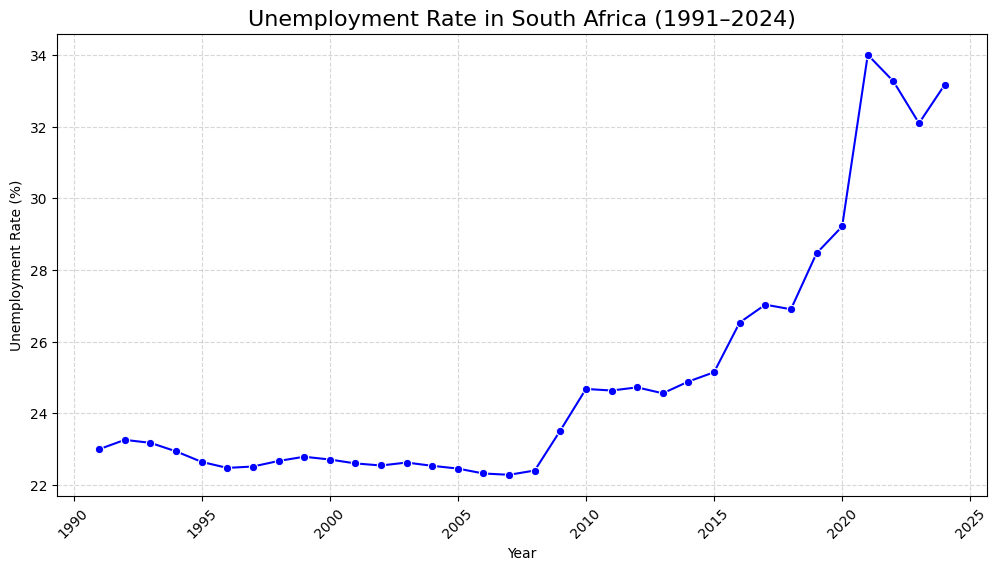

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Unemployment_Rate", data=sa_long, marker="o", color="blue")
plt.title("Unemployment Rate in South Africa (1991–2024)", fontsize=16)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)  # rotate years for readability
plt.show()

In [20]:
print("📊 Average unemployment rate (1991–2024):", round(sa_long["Unemployment_Rate"].mean(), 2), "%")
print("🔼 Year with highest unemployment:", sa_long.loc[sa_long["Unemployment_Rate"].idxmax()].to_dict())
print("🔽 Year with lowest unemployment:", sa_long.loc[sa_long["Unemployment_Rate"].idxmin()].to_dict())

📊 Average unemployment rate (1991–2024): 25.03 %
🔼 Year with highest unemployment: {'Country Name': 'South Africa', 'Unemployment_Rate': 34.007, 'Year': 2021}
🔽 Year with lowest unemployment: {'Country Name': 'South Africa', 'Unemployment_Rate': 22.287, 'Year': 2007}


In [21]:
# Sort by Year just in case
sa_long = sa_long.sort_values("Year")

# Calculate 3-year moving average
sa_long["MA_3yr"] = sa_long["Unemployment_Rate"].rolling(window=3).mean()


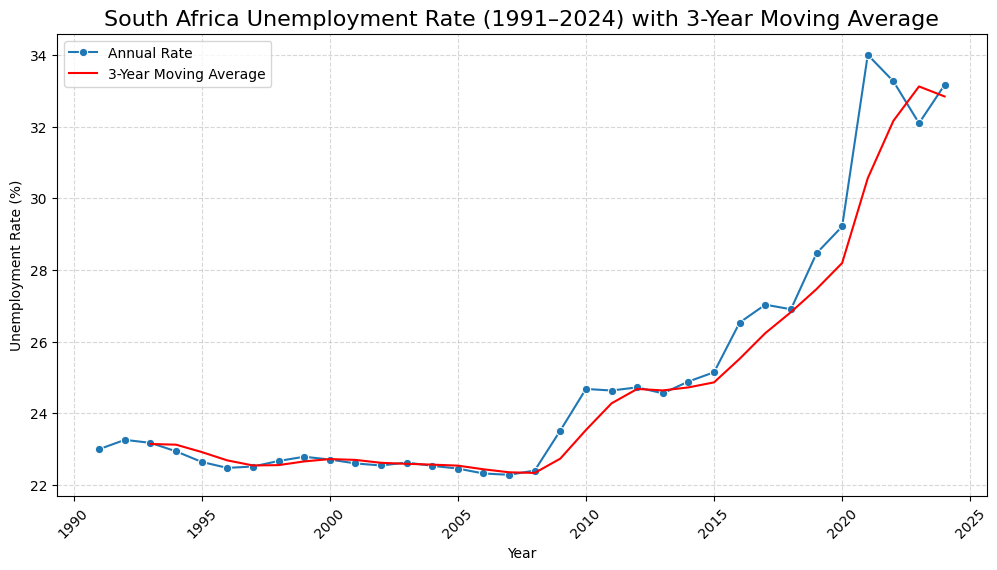

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Unemployment_Rate", data=sa_long, marker="o", label="Annual Rate")
sns.lineplot(x="Year", y="MA_3yr", data=sa_long, color="red", label="3-Year Moving Average")
plt.title("South Africa Unemployment Rate (1991–2024) with 3-Year Moving Average", fontsize=16)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.show()

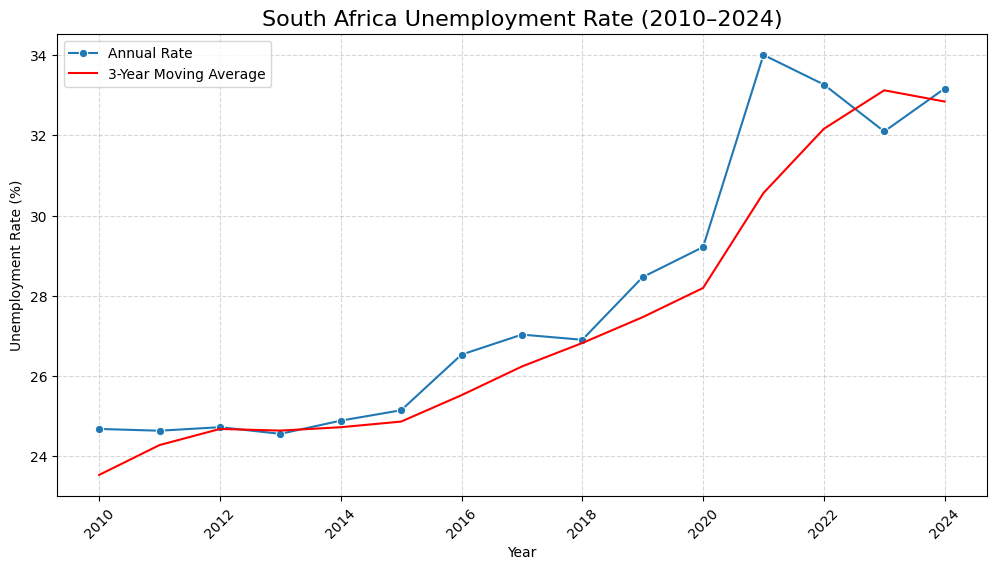

In [23]:
recent = sa_long[sa_long["Year"] >= 2010]

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Unemployment_Rate", data=recent, marker="o", label="Annual Rate")
sns.lineplot(x="Year", y="MA_3yr", data=recent, color="red", label="3-Year Moving Average")
plt.title("South Africa Unemployment Rate (2010–2024)", fontsize=16)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [24]:
print("📊 Average unemployment (2010–2024):", round(recent["Unemployment_Rate"].mean(),2), "%")
print("🔼 Highest unemployment in recent years:", recent.loc[recent["Unemployment_Rate"].idxmax()].to_dict())
print("🔽 Lowest unemployment in recent years:", recent.loc[recent["Unemployment_Rate"].idxmin()].to_dict())

📊 Average unemployment (2010–2024): 27.96 %
🔼 Highest unemployment in recent years: {'Country Name': 'South Africa', 'Unemployment_Rate': 34.007, 'Year': 2021, 'MA_3yr': 30.563999999999997}
🔽 Lowest unemployment in recent years: {'Country Name': 'South Africa', 'Unemployment_Rate': 24.561, 'Year': 2013, 'MA_3yr': 24.64233333333333}


In [25]:
sa_long["Yearly_Change"] = sa_long["Unemployment_Rate"].diff()
print(sa_long[["Year", "Unemployment_Rate", "Yearly_Change"]].tail(10))

    Year  Unemployment_Rate  Yearly_Change
55  2015             25.149          0.259
56  2016             26.536          1.387
57  2017             27.035          0.499
58  2018             26.906         -0.129
59  2019             28.468          1.562
60  2020             29.217          0.749
61  2021             34.007          4.790
62  2022             33.268         -0.739
63  2023             32.098         -1.170
64  2024             33.168          1.070


In [26]:
sa_long["Pct_Change"] = sa_long["Unemployment_Rate"].pct_change() * 100
print(sa_long[["Year", "Unemployment_Rate", "Pct_Change"]].tail(10))

    Year  Unemployment_Rate  Pct_Change
55  2015             25.149    1.040579
56  2016             26.536    5.515130
57  2017             27.035    1.880464
58  2018             26.906   -0.477159
59  2019             28.468    5.805397
60  2020             29.217    2.631024
61  2021             34.007   16.394565
62  2022             33.268   -2.173082
63  2023             32.098   -3.516893
64  2024             33.168    3.333541


In [27]:
mean_rate = sa_long["Unemployment_Rate"].mean()
std_rate = sa_long["Unemployment_Rate"].std()

outliers = sa_long[(sa_long["Unemployment_Rate"] > mean_rate + std_rate) |
                   (sa_long["Unemployment_Rate"] < mean_rate - std_rate)]
outliers

,Country Name,Unemployment_Rate,Year,MA_3yr,Yearly_Change,Pct_Change
60,South Africa,29.217,2020,28.197000,0.749,2.631024
61,South Africa,34.007,2021,30.564000,4.790,16.394565
62,South Africa,33.268,2022,32.164000,-0.739,-2.173082
63,South Africa,32.098,2023,33.124333,-1.170,-3.516893
64,South Africa,33.168,2024,32.844667,1.070,3.333541


from matplotlib import pyplot as plt
outliers['Unemployment_Rate'].plot(kind='hist', bins=20, title='Unemployment_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
outliers['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
outliers['MA_3yr'].plot(kind='hist', bins=20, title='MA_3yr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
outliers['Yearly_Change'].plot(kind='hist', bins=20, title='Yearly_Change')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
outliers.plot(kind='scatter', x='Unemployment_Rate', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
outliers.plot(kind='scatter', x='Year', y='MA_3yr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
outliers.plot(kind='scatter', x='MA_3yr', y='Yearly_Change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
outliers.plot(kind='scatter', x='Yearly_Change', y='Pct_Change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Unemployment_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = outliers.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Unemployment_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['MA_3yr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = outliers.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('MA_3yr')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Yearly_Change']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = outliers.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Yearly_Change')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Pct_Change']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = outliers.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Pct_Change')

from matplotlib import pyplot as plt
outliers['Unemployment_Rate'].plot(kind='line', figsize=(8, 4), title='Unemployment_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
outliers['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
outliers['MA_3yr'].plot(kind='line', figsize=(8, 4), title='MA_3yr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
outliers['Yearly_Change'].plot(kind='line', figsize=(8, 4), title='Yearly_Change')
plt.gca().spines[['top', 'right']].set_visible(False)

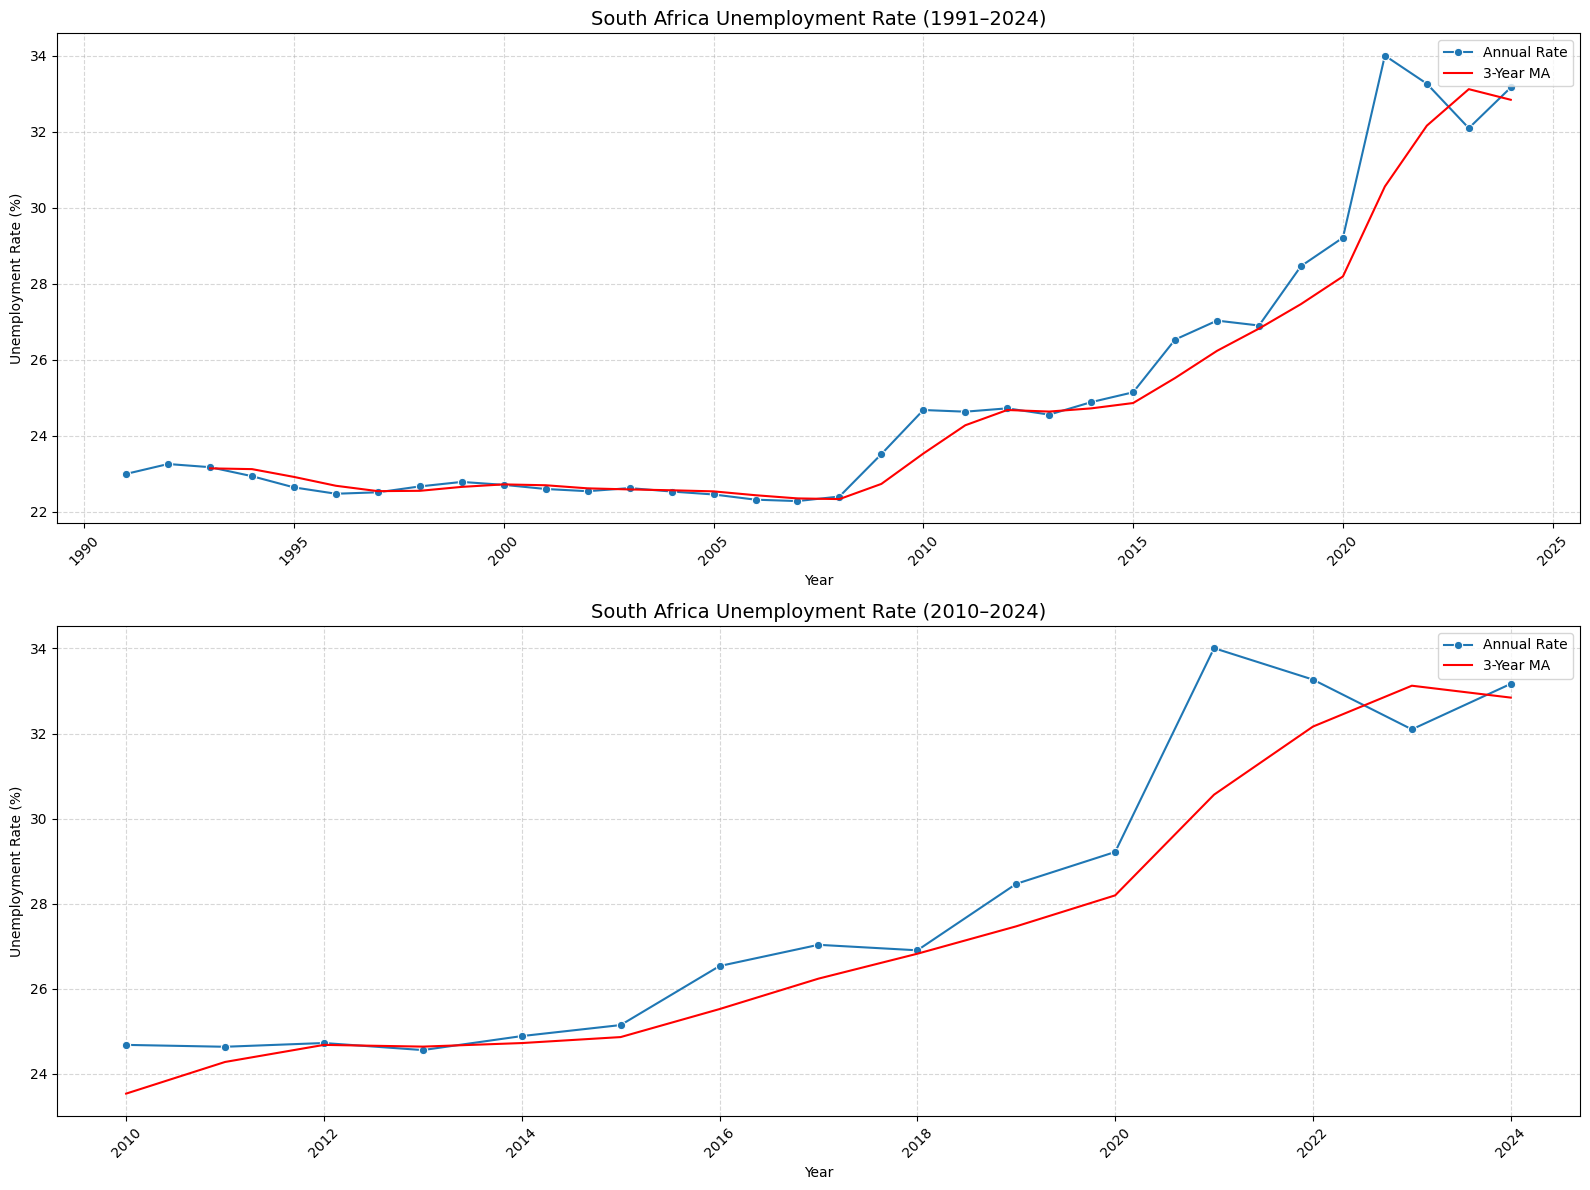

In [28]:
plt.figure(figsize=(16,12))

# Subplot 1: Full Trend
plt.subplot(2,1,1)
sns.lineplot(x="Year", y="Unemployment_Rate", data=sa_long, marker="o", label="Annual Rate")
sns.lineplot(x="Year", y="MA_3yr", data=sa_long, color="red", label="3-Year MA")
plt.title("South Africa Unemployment Rate (1991–2024)", fontsize=14)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.xticks(rotation=45)

# Subplot 2: Recent Years Trend
plt.subplot(2,1,2)
sns.lineplot(x="Year", y="Unemployment_Rate", data=recent, marker="o", label="Annual Rate")
sns.lineplot(x="Year", y="MA_3yr", data=recent, color="red", label="3-Year MA")
plt.title("South Africa Unemployment Rate (2010–2024)", fontsize=14)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
print("📊 Key Insights:")

# Average
print("Average unemployment (1991–2024):", round(sa_long["Unemployment_Rate"].mean(),2), "%")
print("Average unemployment (2010–2024):", round(recent["Unemployment_Rate"].mean(),2), "%")

# Extremes
print("Highest unemployment year:", sa_long.loc[sa_long['Unemployment_Rate'].idxmax()].to_dict())
print("Lowest unemployment year:", sa_long.loc[sa_long['Unemployment_Rate'].idxmin()].to_dict())

# Yearly & % changes
sa_long["Yearly_Change"] = sa_long["Unemployment_Rate"].diff()
sa_long["Pct_Change"] = sa_long["Unemployment_Rate"].pct_change()*100

print("\nLast 5 Years Change:")
print(sa_long[["Year","Unemployment_Rate","Yearly_Change","Pct_Change"]].tail())

📊 Key Insights:
Average unemployment (1991–2024): 25.03 %
Average unemployment (2010–2024): 27.96 %
Highest unemployment year: {'Country Name': 'South Africa', 'Unemployment_Rate': 34.007, 'Year': 2021, 'MA_3yr': 30.563999999999997, 'Yearly_Change': 4.789999999999999, 'Pct_Change': 16.39456480815964}
Lowest unemployment year: {'Country Name': 'South Africa', 'Unemployment_Rate': 22.287, 'Year': 2007, 'MA_3yr': 22.357333333333333, 'Yearly_Change': -0.037000000000002586, 'Pct_Change': -0.16574090664757124}

Last 5 Years Change:
    Year  Unemployment_Rate  Yearly_Change  Pct_Change
60  2020             29.217          0.749    2.631024
61  2021             34.007          4.790   16.394565
62  2022             33.268         -0.739   -2.173082
63  2023             32.098         -1.170   -3.516893
64  2024             33.168          1.070    3.333541
